**Problem Definition**

Convert the Sign Alphabet to Text

**Data**

[Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

1. No cases for the letters J & Z (Reason: J & Z require motion)
2. GrayScale Images
3. Pixel Values Range From 0 to 255
4. Each image contains 784 Pixels


**Evaluation**

Accuracy

**Modelling**

CNN

# Initial End-to-End Workflow (Start)

In [50]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [51]:
# loading the training data (X+y)
train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [52]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [53]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [54]:
X.shape, y.shape

((27455, 784), (27455,))

In [55]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [56]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [57]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [58]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [59]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

In [60]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [61]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [62]:
X_train[0].dtype

tf.float64

In [63]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x20dd5c721d0>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1]))

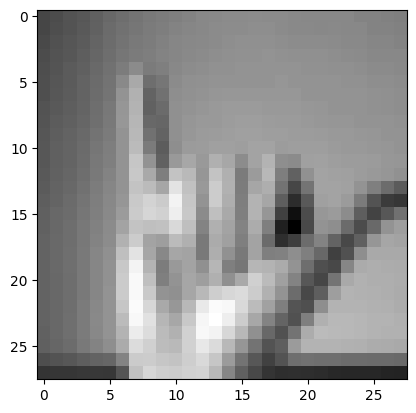

In [64]:
plt.imshow(X[0], cmap='gray'), y[0]

In [65]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 128)       

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [69]:
# The model is same is 'models/initial-end-to-end'
# The history object is 'models/initial-end-to-end-history'

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
593/782 [=====================>........] - ETA: 13s - loss: 0.7398 - accuracy: 0.7714

KeyboardInterrupt: 

In [ ]:
history.history # Contains the training related information for each epoch

{'loss': [0.7513841986656189,
  0.02664635330438614,
  0.022762881591916084,
  0.010220699943602085,
  0.00012576516019180417,
  6.051814489183016e-05,
  3.528659726725891e-05,
  2.1571140678133816e-05,
  1.3857513295079116e-05,
  8.755312592256814e-06,
  5.87734348300728e-06,
  3.7233867260511033e-06,
  2.4677576675458113e-06,
  1.6568279761486338e-06,
  1.0794689160320559e-06,
  7.527679031227308e-07,
  4.797810220225074e-07,
  3.2828162943587813e-07,
  2.0977452663828444e-07,
  1.5246314433170483e-07],
 'accuracy': [0.7666800022125244,
  0.9937599897384644,
  0.9936000108718872,
  0.9973199963569641,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.05022267624735832,
  0.0008405293920077384,
  0.0955815389752388,
  0.00023874384351074696,
  0.00010830002429429442,
  6.011408913764171e-05,
  3.748569361050613e-05,
  2.4087832571240142e-05,
  1.6231379049713723e-05,
  1.1084453035437036e-05,
  7.3284368227

In [ ]:
# Saving the history object

# with open('models/intial-end-to-end-history', 'wb') as history_file:
#     pickle.dump(history.history, history_file)

In [ ]:
h = np.load('models/intial-end-to-end-history', allow_pickle=True)
h

{'loss': [0.8774073719978333,
  0.005074513144791126,
  0.0005907623562961817,
  0.035671062767505646,
  0.00012915894330944866,
  6.119009776739404e-05,
  3.5120148822898045e-05,
  2.134285750798881e-05,
  1.3638154086947907e-05,
  8.999433703138493e-06,
  5.808890364278341e-06,
  3.864049176627304e-06,
  2.576162614786881e-06,
  1.7137577970061102e-06,
  1.1716660992533434e-06,
  7.670482204957807e-07,
  5.091210937280266e-07,
  3.424441104016296e-07,
  2.2814701594597864e-07,
  1.518342855888477e-07],
 'accuracy': [0.7325999736785889,
  0.9993600249290466,
  1.0,
  0.9892799854278564,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.02665344439446926,
  0.0010351891396567225,
  0.0004752879322040826,
  0.00024525265325792134,
  0.00010227379971183836,
  5.5580920161446556e-05,
  3.293823101557791e-05,
  2.091940950776916e-05,
  1.3808692528982647e-05,
  8.840480404614937e-06,
  5.666528068104526e-06,
  3

In [ ]:
best_model = keras.models.load_model('models/initial-end-to-end') # Model with best set of parameters not necessarily the model at the last epoch of training

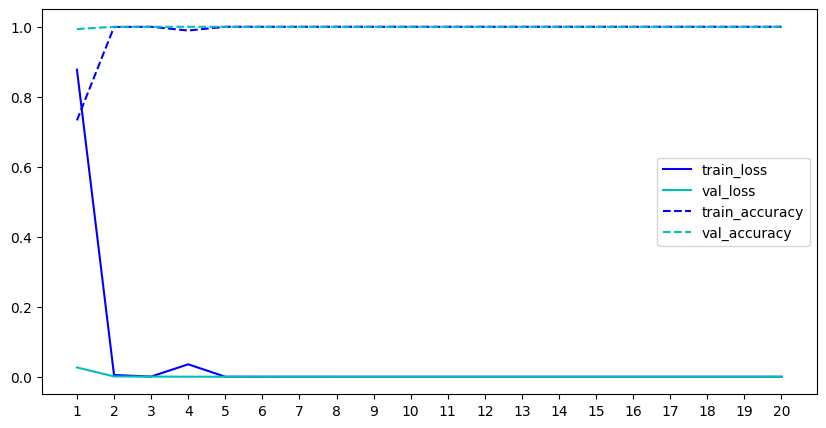

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

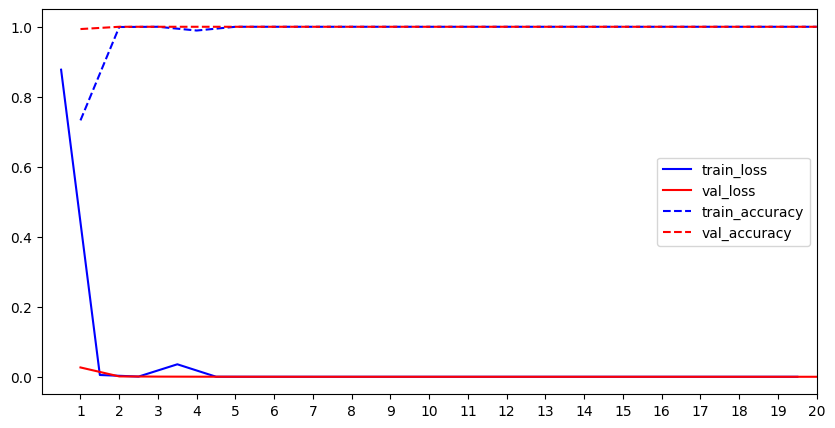

In [ ]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])

# Shift training loss by 0.5 as training loss is measured during the epoch and validation loss is measured after the epoch

x_loss = np.arange(n_epochs+1)-0.5
ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [ ]:
# Defining a function the get the training and validation plots representing the accuracy and loss at each epoch

def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history
    
    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5
    
    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

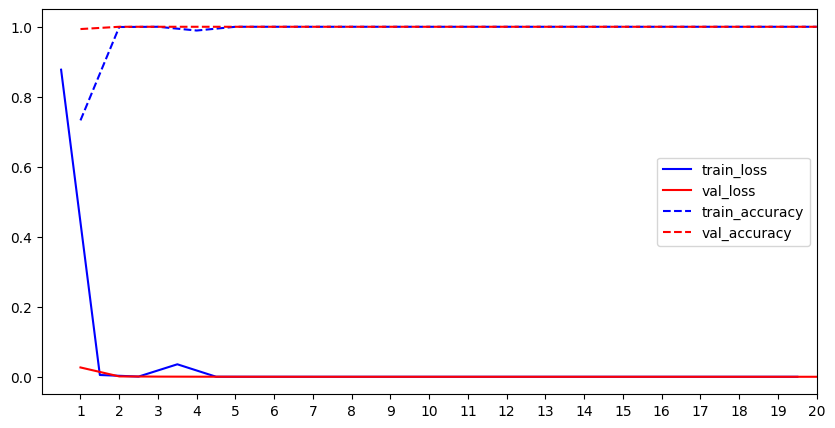

In [ ]:
get_train_val_plots(h)

In [ ]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [ ]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [ ]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [ ]:
y_test = label_binarizer.transform(y_test)

In [ ]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 5s 19ms/step - loss: 123.5888 - accuracy: 0.9399


[123.58880615234375, 0.9399051666259766]

Accuracy: 94%

In [ ]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [ ]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

225/225 [==============================] - 4s 20ms/step - loss: 123.5888 - accuracy: 0.9399
Loss: 123.589 Accuracy: 0.940


## Converting Images to a Sentence

In [ ]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [ ]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [ ]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [ ]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [ ]:
sentence = 'sign language'

for i in sentence:
    print(d[i], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [ ]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 [==============================] - 0s 134ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 [==============================] - 0s 33ms/step
sign lauquage


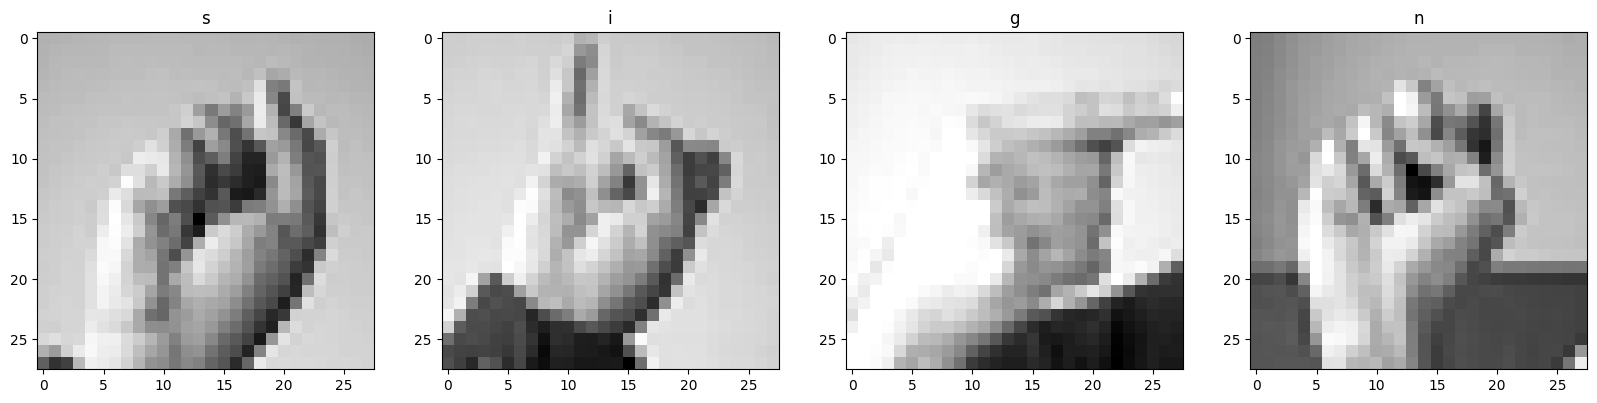

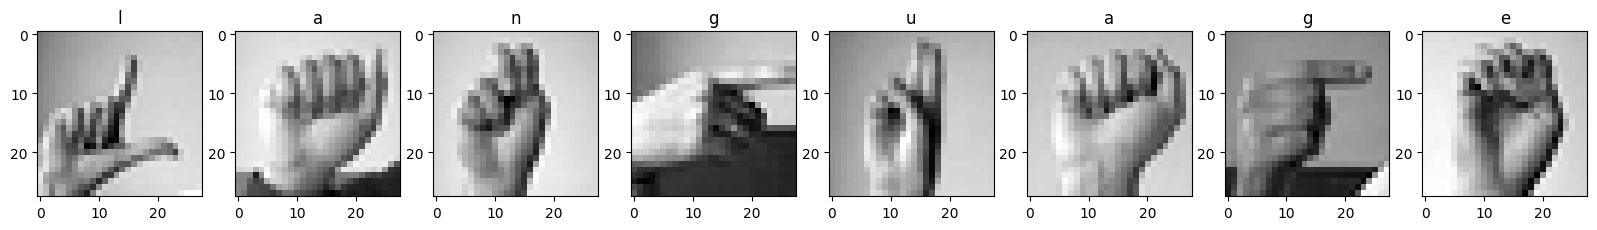

In [ ]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(20, 20))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [ ]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed
    
    sentence = sentence.lower()
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '
    
    
    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 [==============================] - 0s 32ms/step
The actual sentence is "sign language"
The predicted sentence is "sign language"


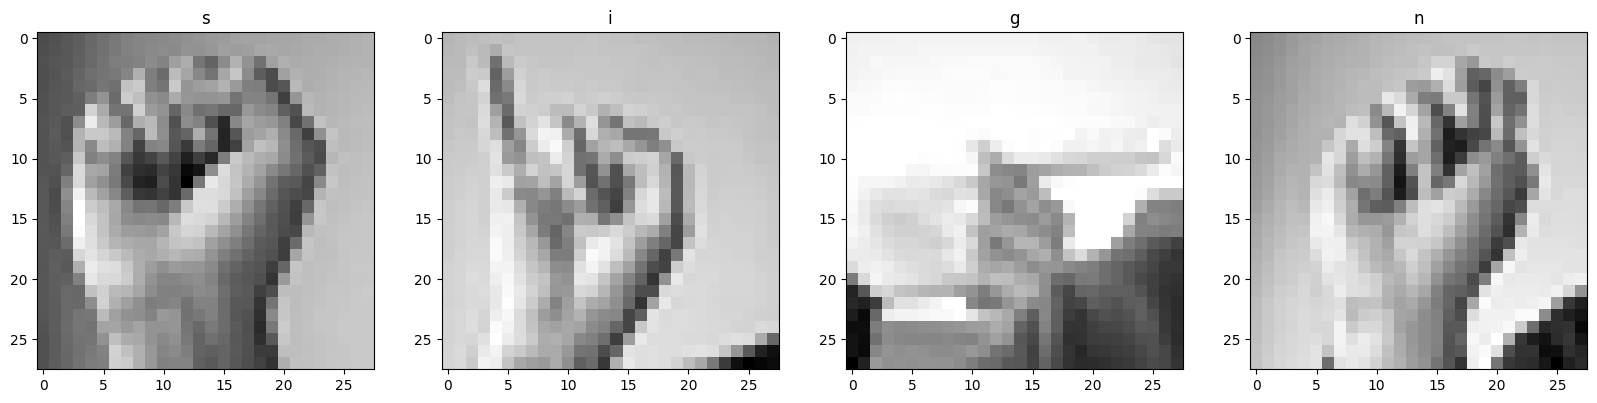

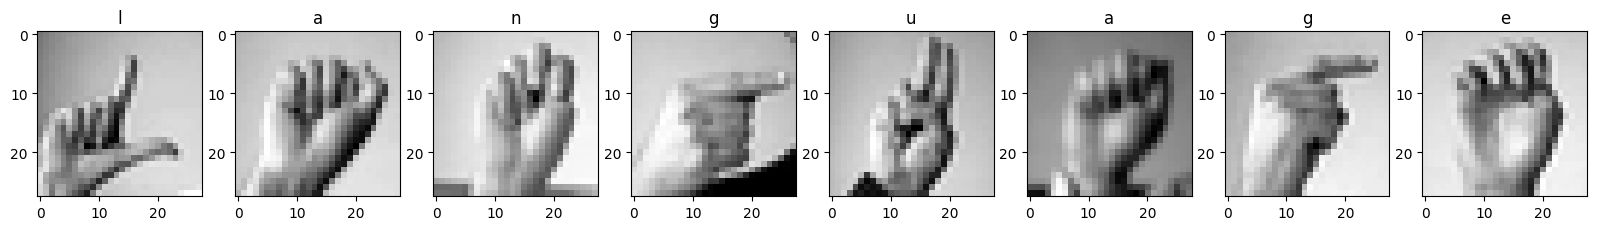

In [ ]:
test_on_sentence(best_model, 'sign language', test_df.drop('label', axis=1), test_df['label'], label_binarizer)

# Initial End-to-End Workflow (End)

# Hyperparameter Tuning

1. Convolution and Max Pooling Pairs
2. Filters in the convolution layers
3. Filter Shape
4. Dropout

## Convolution and Max Pooling Pairs

Before flattening


1. For pair = 1 -> Output to the dense layer will be of the shape `(None, 14, 14, 32)`
2. For pair = 2 -> Output to the dense layer will be of the shape `(None, 7, 7, 64)`
3. For pair = 3 -> Output to the dense layer will be of the shape `(None, 3, 3, 96)`
4. For pair = 4 -> Output to the dense layer will be of the shape `(None, 1, 1, 128)`

As the output shape rapidly decreases for the pair = 4 it is better to choose among the pair = 1, 2 or 3

In [ ]:
# 20% Validation Split

X_train, X_valid = X[:19500], X[19500:]
y_train, y_valid = y[:19500], y[19500:]

In [70]:
# Models
# 'models/experiment-1-1'
# 'models/experiment-1-2'
# 'models/experiment-1-3'

# History objects
# 'models/experiment-1-1-history'
# 'models/experiment-1-2-history'
# 'models/experiment-1-3-history'

n_pairs = 3
models_pairs = [keras.models.Sequential() for i in range(n_pairs)]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

for n in range(1, n_pairs+1):
    models_pairs[n-1].add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(1, n):
        models_pairs[n-1].add(keras.layers.Conv2D(32*(i+1), (5, 5), padding='same', activation='relu'))
        models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    models_pairs[n-1].add(keras.layers.Flatten())
    models_pairs[n-1].add(keras.layers.Dense(128, activation='relu'))
    models_pairs[n-1].add(keras.layers.Dense(24, activation='softmax'))
    models_pairs[n-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-1-{n}', save_best_only=True)
    history = models_pairs[n-1].fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-1-{n}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/15
780/782 [============================>.] - ETA: 0s - loss: 1.0823 - accuracy: 0.7009

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 18s 23ms/step - loss: 1.0809 - accuracy: 0.7013 - val_loss: 0.2630 - val_accuracy: 0.9401
Epoch 2/15
780/782 [============================>.] - ETA: 0s - loss: 0.1126 - accuracy: 0.9823

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 19s 25ms/step - loss: 0.1125 - accuracy: 0.9823 - val_loss: 0.0413 - val_accuracy: 0.9988
Epoch 3/15
781/782 [============================>.] - ETA: 0s - loss: 0.0208 - accuracy: 0.9998

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 23s 30ms/step - loss: 0.0208 - accuracy: 0.9998 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 4/15
782/782 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 17s 22ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 5/15
782/782 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 18s 23ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/15
780/782 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 18s 23ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/15
782/782 [==============================] - 18s 23ms/step - loss: 8.8782e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 8/15
780/782 [============================>.] - ETA: 0s - loss: 5.9311e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 18s 23ms/step - loss: 5.9283e-04 - accuracy: 1.0000 - val_loss: 4.7892e-04 - val_accuracy: 1.0000
Epoch 9/15
782/782 [==============================] - 17s 22ms/step - loss: 0.0175 - accuracy: 0.9952 - val_loss: 0.1744 - val_accuracy: 0.9446
Epoch 10/15
782/782 [==============================] - 17s 22ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 5.9679e-04 - val_accuracy: 1.0000
Epoch 11/15
781/782 [============================>.] - ETA: 0s - loss: 3.7807e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 17s 21ms/step - loss: 3.7800e-04 - accuracy: 1.0000 - val_loss: 3.6284e-04 - val_accuracy: 1.0000
Epoch 12/15
782/782 [==============================] - ETA: 0s - loss: 2.4127e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 17s 22ms/step - loss: 2.4127e-04 - accuracy: 1.0000 - val_loss: 2.3621e-04 - val_accuracy: 1.0000
Epoch 13/15
781/782 [============================>.] - ETA: 0s - loss: 1.6747e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 18s 24ms/step - loss: 1.6742e-04 - accuracy: 1.0000 - val_loss: 1.7823e-04 - val_accuracy: 1.0000
Epoch 14/15
780/782 [============================>.] - ETA: 0s - loss: 1.2312e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 18s 23ms/step - loss: 1.2323e-04 - accuracy: 1.0000 - val_loss: 1.3736e-04 - val_accuracy: 1.0000
Epoch 15/15
781/782 [============================>.] - ETA: 0s - loss: 9.3549e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


782/782 [==============================] - 19s 24ms/step - loss: 9.3543e-05 - accuracy: 1.0000 - val_loss: 1.0053e-04 - val_accuracy: 1.0000
Epoch 1/15
781/782 [============================>.] - ETA: 0s - loss: 0.7120 - accuracy: 0.7879

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 39s 49ms/step - loss: 0.7118 - accuracy: 0.7879 - val_loss: 0.0646 - val_accuracy: 0.9804
Epoch 2/15
781/782 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9979

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 46s 59ms/step - loss: 0.0147 - accuracy: 0.9978 - val_loss: 0.0188 - val_accuracy: 0.9959
Epoch 3/15
781/782 [============================>.] - ETA: 0s - loss: 0.0177 - accuracy: 0.9960

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 43s 55ms/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 8.5504e-04 - val_accuracy: 1.0000
Epoch 4/15
781/782 [============================>.] - ETA: 0s - loss: 4.5014e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 40s 51ms/step - loss: 4.5013e-04 - accuracy: 1.0000 - val_loss: 3.8859e-04 - val_accuracy: 1.0000
Epoch 5/15
781/782 [============================>.] - ETA: 0s - loss: 2.3041e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 38s 48ms/step - loss: 2.3036e-04 - accuracy: 1.0000 - val_loss: 2.1279e-04 - val_accuracy: 1.0000
Epoch 6/15
782/782 [==============================] - ETA: 0s - loss: 1.3613e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 42s 54ms/step - loss: 1.3613e-04 - accuracy: 1.0000 - val_loss: 1.3712e-04 - val_accuracy: 1.0000
Epoch 7/15
782/782 [==============================] - ETA: 0s - loss: 8.4872e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 40s 51ms/step - loss: 8.4872e-05 - accuracy: 1.0000 - val_loss: 7.8103e-05 - val_accuracy: 1.0000
Epoch 8/15
781/782 [============================>.] - ETA: 0s - loss: 5.1978e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 38s 48ms/step - loss: 5.1964e-05 - accuracy: 1.0000 - val_loss: 4.7047e-05 - val_accuracy: 1.0000
Epoch 9/15
782/782 [==============================] - ETA: 0s - loss: 3.2766e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 39s 50ms/step - loss: 3.2766e-05 - accuracy: 1.0000 - val_loss: 3.1301e-05 - val_accuracy: 1.0000
Epoch 10/15
781/782 [============================>.] - ETA: 0s - loss: 2.1518e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 39s 50ms/step - loss: 2.1514e-05 - accuracy: 1.0000 - val_loss: 1.9379e-05 - val_accuracy: 1.0000
Epoch 11/15
782/782 [==============================] - ETA: 0s - loss: 1.3222e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 39s 50ms/step - loss: 1.3222e-05 - accuracy: 1.0000 - val_loss: 1.2970e-05 - val_accuracy: 1.0000
Epoch 12/15
782/782 [==============================] - ETA: 0s - loss: 8.7497e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 48s 61ms/step - loss: 8.7497e-06 - accuracy: 1.0000 - val_loss: 8.5914e-06 - val_accuracy: 1.0000
Epoch 13/15
781/782 [============================>.] - ETA: 0s - loss: 5.5695e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 40s 52ms/step - loss: 5.5685e-06 - accuracy: 1.0000 - val_loss: 5.4153e-06 - val_accuracy: 1.0000
Epoch 14/15
782/782 [==============================] - ETA: 0s - loss: 3.6933e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 39s 50ms/step - loss: 3.6933e-06 - accuracy: 1.0000 - val_loss: 4.2179e-06 - val_accuracy: 1.0000
Epoch 15/15
781/782 [============================>.] - ETA: 0s - loss: 2.3734e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


782/782 [==============================] - 38s 49ms/step - loss: 2.3731e-06 - accuracy: 1.0000 - val_loss: 2.6454e-06 - val_accuracy: 1.0000
Epoch 1/15
781/782 [============================>.] - ETA: 0s - loss: 0.8801 - accuracy: 0.7298

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 54s 68ms/step - loss: 0.8798 - accuracy: 0.7299 - val_loss: 0.0551 - val_accuracy: 0.9853
Epoch 2/15
782/782 [==============================] - 51s 65ms/step - loss: 0.0284 - accuracy: 0.9934 - val_loss: 0.0718 - val_accuracy: 0.9800
Epoch 3/15
781/782 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9997

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 51s 65ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 2.6870e-04 - val_accuracy: 1.0000
Epoch 4/15
781/782 [============================>.] - ETA: 0s - loss: 1.6512e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 53s 67ms/step - loss: 1.6522e-04 - accuracy: 1.0000 - val_loss: 1.2752e-04 - val_accuracy: 1.0000
Epoch 5/15
781/782 [============================>.] - ETA: 0s - loss: 9.3319e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 54s 69ms/step - loss: 9.3294e-05 - accuracy: 1.0000 - val_loss: 1.0386e-04 - val_accuracy: 1.0000
Epoch 6/15
781/782 [============================>.] - ETA: 0s - loss: 5.7120e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 56s 72ms/step - loss: 5.7102e-05 - accuracy: 1.0000 - val_loss: 5.4195e-05 - val_accuracy: 1.0000
Epoch 7/15
781/782 [============================>.] - ETA: 0s - loss: 3.6817e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 51s 66ms/step - loss: 3.6815e-05 - accuracy: 1.0000 - val_loss: 2.9967e-05 - val_accuracy: 1.0000
Epoch 8/15
781/782 [============================>.] - ETA: 0s - loss: 2.3013e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 50s 64ms/step - loss: 2.3016e-05 - accuracy: 1.0000 - val_loss: 1.9198e-05 - val_accuracy: 1.0000
Epoch 9/15
781/782 [============================>.] - ETA: 0s - loss: 1.5311e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 51s 65ms/step - loss: 1.5308e-05 - accuracy: 1.0000 - val_loss: 1.3803e-05 - val_accuracy: 1.0000
Epoch 10/15
781/782 [============================>.] - ETA: 0s - loss: 9.6590e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 55s 70ms/step - loss: 9.6581e-06 - accuracy: 1.0000 - val_loss: 1.2964e-05 - val_accuracy: 1.0000
Epoch 11/15
781/782 [============================>.] - ETA: 0s - loss: 6.3676e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 55s 71ms/step - loss: 6.3680e-06 - accuracy: 1.0000 - val_loss: 5.4460e-06 - val_accuracy: 1.0000
Epoch 12/15
781/782 [============================>.] - ETA: 0s - loss: 4.2946e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 56s 71ms/step - loss: 4.2933e-06 - accuracy: 1.0000 - val_loss: 3.9535e-06 - val_accuracy: 1.0000
Epoch 13/15
781/782 [============================>.] - ETA: 0s - loss: 2.6353e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 56s 71ms/step - loss: 2.6348e-06 - accuracy: 1.0000 - val_loss: 2.9039e-06 - val_accuracy: 1.0000
Epoch 14/15
781/782 [============================>.] - ETA: 0s - loss: 1.7569e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 55s 70ms/step - loss: 1.7564e-06 - accuracy: 1.0000 - val_loss: 1.5682e-06 - val_accuracy: 1.0000
Epoch 15/15
781/782 [============================>.] - ETA: 0s - loss: 1.1732e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


782/782 [==============================] - 55s 70ms/step - loss: 1.1729e-06 - accuracy: 1.0000 - val_loss: 1.0594e-06 - val_accuracy: 1.0000


In [71]:
models_pairs[0].summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               802944    
                                                                 
 dense_13 (Dense)            (None, 24)                3096      
                                                                 
Total params: 806,872
Trainable params: 806,872
Non-trainable params: 0
________________________________________________

In [72]:
models_pairs[1].summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [73]:
models_pairs[2].summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 96)          153696    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 3, 3, 96)       

In [74]:
for index in range(n_pairs):
    model = keras.models.load_model(f'models/experiment-1-{index+1}')
    model.evaluate(X_valid, y_valid)

77/77 [==============================] - 2s 20ms/step - loss: 1.0594e-06 - accuracy: 1.0000


In [75]:
h_1_1 = np.load('models/experiment-1-1-history', allow_pickle=True)
h_1_2 = np.load('models/experiment-1-2-history', allow_pickle=True)
h_1_3 = np.load('models/experiment-1-3-history', allow_pickle=True)

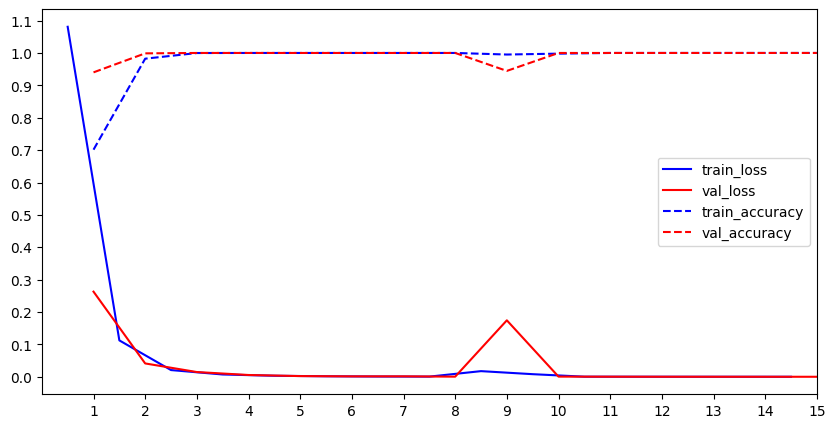

In [76]:
get_train_val_plots(h_1_1, yticks=np.arange(0, 1.2, 0.1))

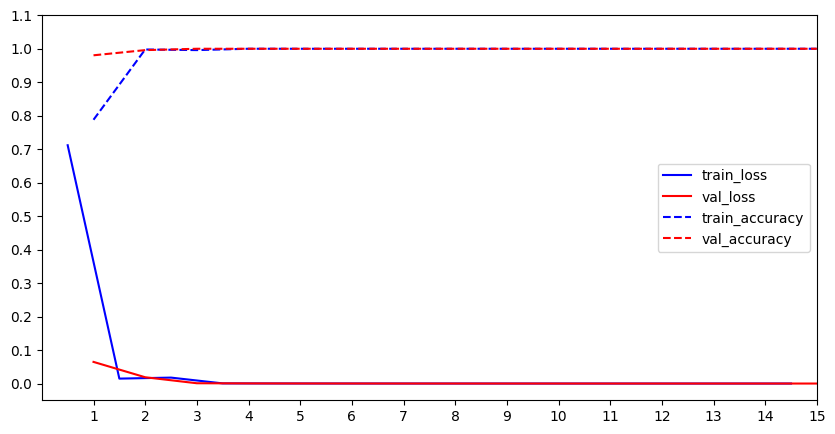

In [77]:
get_train_val_plots(h_1_2, yticks=np.arange(0, 1.2, 0.1))

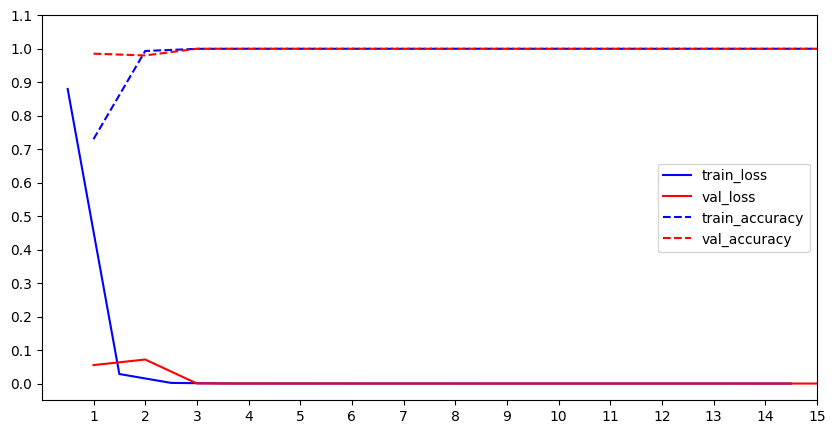

In [78]:
get_train_val_plots(h_1_3, yticks=np.arange(0, 1.2, 0.1))

Model 3 has the least loss on the validation data

## Filters

Our Models now contains 3 pairs of Convolution and Pooling layers

Number of filters maps can be

1. 8 - 16 - 32
2. 16 - 32 - 64
3. 24 - 48 - 96

In [79]:
# Models
# 'models/experiment-fmaps-1'
# 'models/experiment-fmaps-2'
# 'models/experiment-fmaps-3'

# History objects
# 'models/experiment-fmaps-1-history'
# 'models/experiment-fmaps-2-history'
# 'models/experiment-fmaps-3-history'

n_tests = 3

models = []
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)


for i in range(n_tests):
    model = keras.models.Sequential()
    models.append(model)
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    for pairs in range(3):
        model.add(keras.layers.Conv2D((8*(i+1))*(2**pairs), (5, 5), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fmaps-{i+1}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-fmaps-{i+1}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
781/782 [============================>.] - ETA: 0s - loss: 1.0449 - accuracy: 0.6721

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


782/782 [==============================] - 20s 24ms/step - loss: 1.0446 - accuracy: 0.6722 - val_loss: 0.2456 - val_accuracy: 0.9218
Epoch 2/10
779/782 [============================>.] - ETA: 0s - loss: 0.0861 - accuracy: 0.9771

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


782/782 [==============================] - 17s 22ms/step - loss: 0.0860 - accuracy: 0.9771 - val_loss: 0.0684 - val_accuracy: 0.9796
Epoch 3/10
780/782 [============================>.] - ETA: 0s - loss: 0.0167 - accuracy: 0.9967

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


782/782 [==============================] - 18s 23ms/step - loss: 0.0167 - accuracy: 0.9967 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 0.0387 - accuracy: 0.9888 - val_loss: 0.0091 - val_accuracy: 0.9988
Epoch 5/10
781/782 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


782/782 [==============================] - 17s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 5.3287e-04 - val_accuracy: 1.0000
Epoch 6/10
779/782 [============================>.] - ETA: 0s - loss: 3.0308e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


782/782 [==============================] - 18s 23ms/step - loss: 3.0276e-04 - accuracy: 1.0000 - val_loss: 2.7828e-04 - val_accuracy: 1.0000
Epoch 7/10
782/782 [==============================] - ETA: 0s - loss: 1.6916e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


782/782 [==============================] - 17s 22ms/step - loss: 1.6916e-04 - accuracy: 1.0000 - val_loss: 1.5094e-04 - val_accuracy: 1.0000
Epoch 8/10
779/782 [============================>.] - ETA: 0s - loss: 9.9834e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


782/782 [==============================] - 18s 23ms/step - loss: 9.9600e-05 - accuracy: 1.0000 - val_loss: 9.7430e-05 - val_accuracy: 1.0000
Epoch 9/10
780/782 [============================>.] - ETA: 0s - loss: 6.0817e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


782/782 [==============================] - 18s 23ms/step - loss: 6.0769e-05 - accuracy: 1.0000 - val_loss: 6.3974e-05 - val_accuracy: 1.0000
Epoch 10/10
780/782 [============================>.] - ETA: 0s - loss: 3.9202e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


782/782 [==============================] - 18s 23ms/step - loss: 3.9164e-05 - accuracy: 1.0000 - val_loss: 4.7822e-05 - val_accuracy: 1.0000
Epoch 1/10
781/782 [============================>.] - ETA: 0s - loss: 0.9331 - accuracy: 0.7178

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


782/782 [==============================] - 27s 34ms/step - loss: 0.9329 - accuracy: 0.7179 - val_loss: 0.1298 - val_accuracy: 0.9576
Epoch 2/10
781/782 [============================>.] - ETA: 0s - loss: 0.0346 - accuracy: 0.9917

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


782/782 [==============================] - 26s 34ms/step - loss: 0.0346 - accuracy: 0.9917 - val_loss: 0.0142 - val_accuracy: 0.9980
Epoch 3/10
781/782 [============================>.] - ETA: 0s - loss: 0.0244 - accuracy: 0.9935

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


782/782 [==============================] - 29s 37ms/step - loss: 0.0244 - accuracy: 0.9935 - val_loss: 7.5933e-04 - val_accuracy: 1.0000
Epoch 4/10
780/782 [============================>.] - ETA: 0s - loss: 3.8901e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


782/782 [==============================] - 30s 38ms/step - loss: 3.8876e-04 - accuracy: 1.0000 - val_loss: 2.7239e-04 - val_accuracy: 1.0000
Epoch 5/10
781/782 [============================>.] - ETA: 0s - loss: 1.6239e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


782/782 [==============================] - 1002s 1s/step - loss: 1.6239e-04 - accuracy: 1.0000 - val_loss: 1.4423e-04 - val_accuracy: 1.0000
Epoch 6/10
780/782 [============================>.] - ETA: 0s - loss: 9.3752e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


782/782 [==============================] - 96s 123ms/step - loss: 9.3666e-05 - accuracy: 1.0000 - val_loss: 9.4274e-05 - val_accuracy: 1.0000
Epoch 7/10
780/782 [============================>.] - ETA: 0s - loss: 5.7582e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


782/782 [==============================] - 26s 33ms/step - loss: 5.7510e-05 - accuracy: 1.0000 - val_loss: 5.5955e-05 - val_accuracy: 1.0000
Epoch 8/10
780/782 [============================>.] - ETA: 0s - loss: 3.5825e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


782/782 [==============================] - 26s 33ms/step - loss: 3.5795e-05 - accuracy: 1.0000 - val_loss: 3.4964e-05 - val_accuracy: 1.0000
Epoch 9/10
782/782 [==============================] - ETA: 0s - loss: 2.3312e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


782/782 [==============================] - 28s 35ms/step - loss: 2.3312e-05 - accuracy: 1.0000 - val_loss: 2.3563e-05 - val_accuracy: 1.0000
Epoch 10/10
781/782 [============================>.] - ETA: 0s - loss: 1.5695e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


782/782 [==============================] - 28s 36ms/step - loss: 1.5691e-05 - accuracy: 1.0000 - val_loss: 1.4049e-05 - val_accuracy: 1.0000
Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 0.7442 - accuracy: 0.7676

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


782/782 [==============================] - 39s 49ms/step - loss: 0.7442 - accuracy: 0.7676 - val_loss: 0.0734 - val_accuracy: 0.9747
Epoch 2/10
782/782 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9933

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


782/782 [==============================] - 39s 50ms/step - loss: 0.0269 - accuracy: 0.9933 - val_loss: 0.0105 - val_accuracy: 0.9988
Epoch 3/10
781/782 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9949

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


782/782 [==============================] - 40s 51ms/step - loss: 0.0183 - accuracy: 0.9949 - val_loss: 3.3354e-04 - val_accuracy: 1.0000
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 1.7726e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


782/782 [==============================] - 37s 48ms/step - loss: 1.7726e-04 - accuracy: 1.0000 - val_loss: 1.2244e-04 - val_accuracy: 1.0000
Epoch 5/10
781/782 [============================>.] - ETA: 0s - loss: 8.0867e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


782/782 [==============================] - 42s 54ms/step - loss: 8.0854e-05 - accuracy: 1.0000 - val_loss: 6.4936e-05 - val_accuracy: 1.0000
Epoch 6/10
782/782 [==============================] - ETA: 0s - loss: 4.5330e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


782/782 [==============================] - 38s 49ms/step - loss: 4.5330e-05 - accuracy: 1.0000 - val_loss: 3.9053e-05 - val_accuracy: 1.0000
Epoch 7/10
781/782 [============================>.] - ETA: 0s - loss: 2.8099e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


782/782 [==============================] - 38s 48ms/step - loss: 2.8096e-05 - accuracy: 1.0000 - val_loss: 2.5082e-05 - val_accuracy: 1.0000
Epoch 8/10
781/782 [============================>.] - ETA: 0s - loss: 1.8248e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


782/782 [==============================] - 41s 52ms/step - loss: 1.8242e-05 - accuracy: 1.0000 - val_loss: 1.6334e-05 - val_accuracy: 1.0000
Epoch 9/10
782/782 [==============================] - ETA: 0s - loss: 1.1654e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


782/782 [==============================] - 37s 47ms/step - loss: 1.1654e-05 - accuracy: 1.0000 - val_loss: 1.1339e-05 - val_accuracy: 1.0000
Epoch 10/10
781/782 [============================>.] - ETA: 0s - loss: 7.9657e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


782/782 [==============================] - 38s 49ms/step - loss: 7.9632e-06 - accuracy: 1.0000 - val_loss: 6.9968e-06 - val_accuracy: 1.0000


In [80]:
models[0].summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 32)          12832     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 3, 3, 32)       

In [81]:
models[1].summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 7, 7, 64)          51264     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 3, 3, 64)       

In [82]:
models[2].summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 7, 7, 48)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 7, 7, 96)          115296    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 3, 3, 96)       

In [83]:
for index in range(n_tests):
    model = keras.models.load_model(f'models/experiment-fmaps-{index+1}')
    model.evaluate(X_valid, y_valid)

77/77 [==============================] - 1s 14ms/step - loss: 6.9968e-06 - accuracy: 1.0000


In [84]:
h_2_1 = np.load('models/experiment-fmaps-1-history', allow_pickle=True)
h_2_2 = np.load('models/experiment-fmaps-2-history', allow_pickle=True)
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)

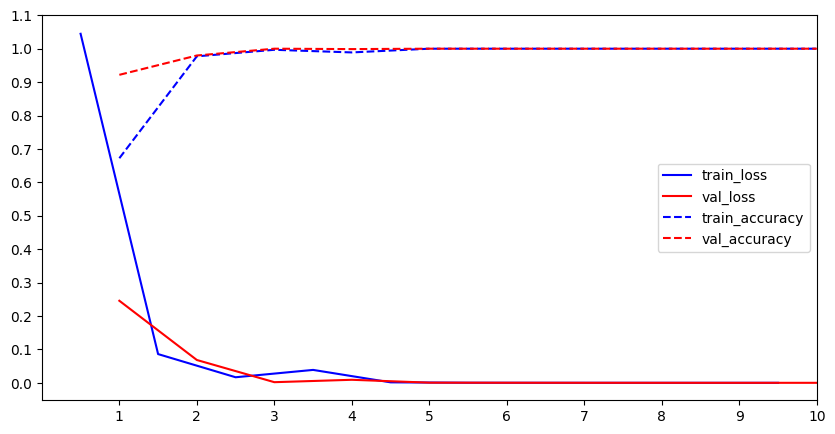

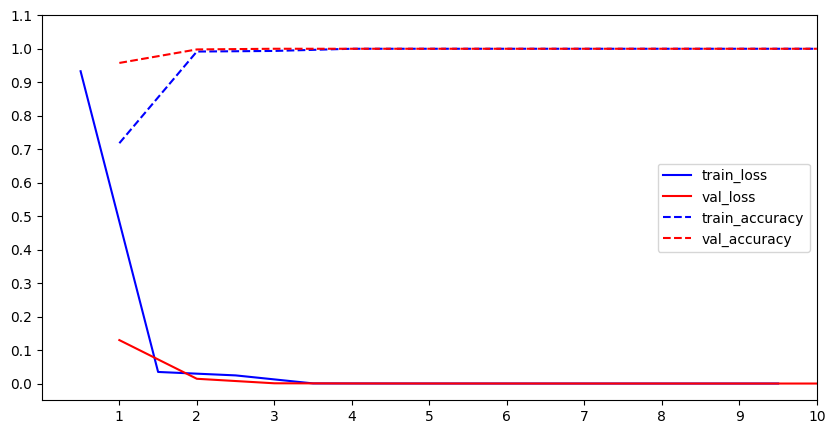

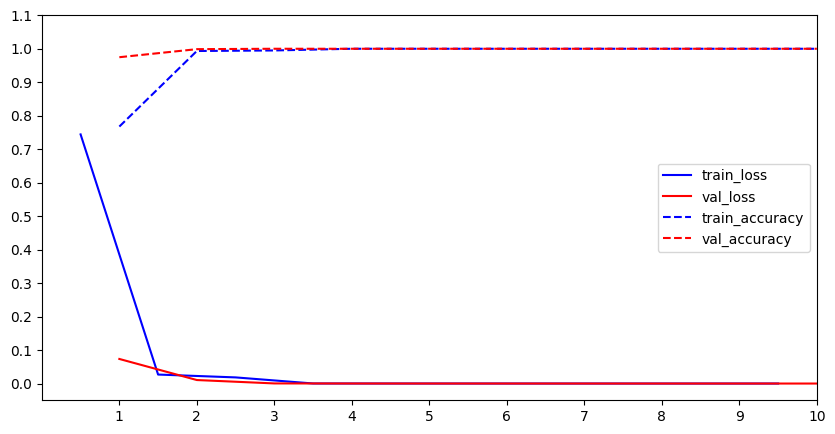

In [86]:
get_train_val_plots(h_2_1, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_2, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

Choose Model 3

## Filter Size

In [87]:
# Models
# 'models/experiment-fiters-1'

# History objects
# 'models/experiment-filters-1-history'

save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fiters-1', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
with open(f'models/experiment-filters-1-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

Epoch 1/10
780/782 [============================>.] - ETA: 0s - loss: 0.8809 - accuracy: 0.7341

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


782/782 [==============================] - 20s 25ms/step - loss: 0.8795 - accuracy: 0.7345 - val_loss: 0.0931 - val_accuracy: 0.9686
Epoch 2/10
780/782 [============================>.] - ETA: 0s - loss: 0.0255 - accuracy: 0.9948

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


782/782 [==============================] - 23s 29ms/step - loss: 0.0255 - accuracy: 0.9948 - val_loss: 0.0055 - val_accuracy: 0.9992
Epoch 3/10
782/782 [==============================] - 19s 24ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0090 - val_accuracy: 0.9976
Epoch 4/10
780/782 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


782/782 [==============================] - 20s 25ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 3.8503e-04 - val_accuracy: 1.0000
Epoch 5/10
781/782 [============================>.] - ETA: 0s - loss: 2.1395e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


782/782 [==============================] - 20s 25ms/step - loss: 2.1389e-04 - accuracy: 1.0000 - val_loss: 1.7513e-04 - val_accuracy: 1.0000
Epoch 6/10
781/782 [============================>.] - ETA: 0s - loss: 1.0946e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


782/782 [==============================] - 19s 25ms/step - loss: 1.0943e-04 - accuracy: 1.0000 - val_loss: 1.1053e-04 - val_accuracy: 1.0000
Epoch 7/10
782/782 [==============================] - ETA: 0s - loss: 6.9235e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


782/782 [==============================] - 19s 25ms/step - loss: 6.9235e-05 - accuracy: 1.0000 - val_loss: 7.2112e-05 - val_accuracy: 1.0000
Epoch 8/10
782/782 [==============================] - ETA: 0s - loss: 4.4376e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


782/782 [==============================] - 21s 26ms/step - loss: 4.4376e-05 - accuracy: 1.0000 - val_loss: 4.9457e-05 - val_accuracy: 1.0000
Epoch 9/10
782/782 [==============================] - ETA: 0s - loss: 2.9254e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


782/782 [==============================] - 20s 25ms/step - loss: 2.9254e-05 - accuracy: 1.0000 - val_loss: 3.2799e-05 - val_accuracy: 1.0000
Epoch 10/10
781/782 [============================>.] - ETA: 0s - loss: 2.0671e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


782/782 [==============================] - 20s 25ms/step - loss: 2.0731e-05 - accuracy: 1.0000 - val_loss: 2.2086e-05 - val_accuracy: 1.0000


In [88]:
model = keras.models.load_model('models/experiment-fiters-1/')
model.evaluate(X_valid, y_valid)

77/77 [==============================] - 1s 10ms/step - loss: 2.2086e-05 - accuracy: 1.0000


[2.208559453720227e-05, 1.0]

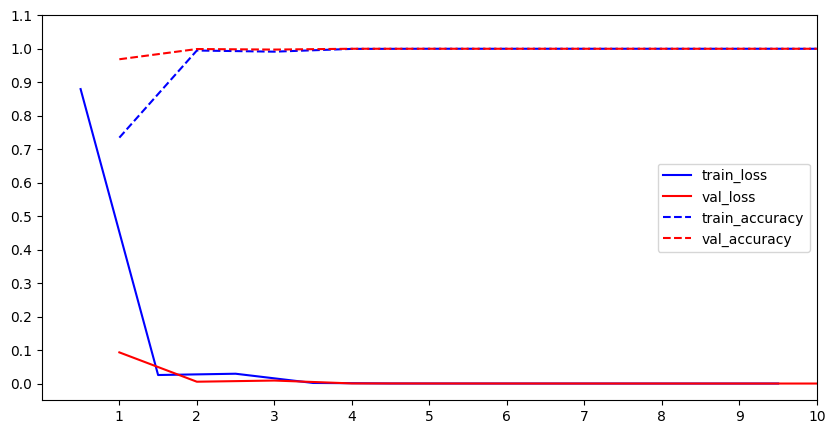

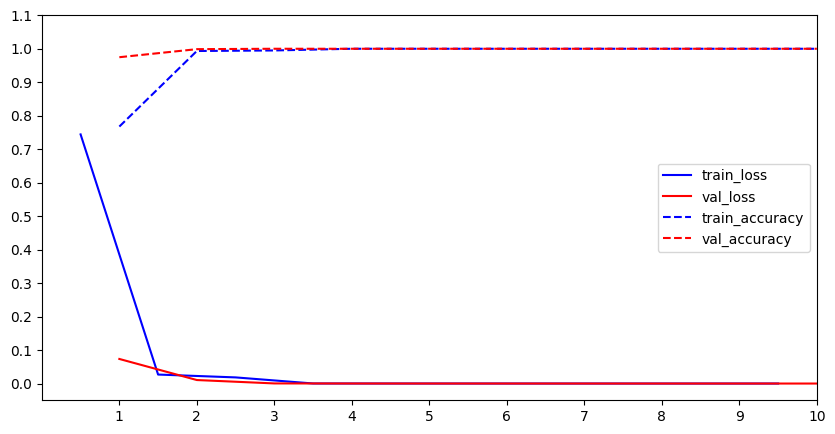

In [89]:
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)
h = np.load('models/experiment-filters-1-history', allow_pickle=True)
get_train_val_plots(h, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

We choose to use filter sizes of (5x5)

## Dropout

In [90]:
# Models
# 'models/experiment-dropout-0'
# 'models/experiment-dropout-1'
# 'models/experiment-dropout-2'

# History objects
# 'models/experiment-dropout-0-history'
# 'models/experiment-dropout-1-history'
# 'models/experiment-dropout-2-history'

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

dropout_rates = [0.3, 0.4, 0.5]

for index, i in enumerate(dropout_rates):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-dropout-{index}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-dropout-{index}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 1.5736 - accuracy: 0.5054

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


782/782 [==============================] - 43s 54ms/step - loss: 1.5736 - accuracy: 0.5054 - val_loss: 0.1797 - val_accuracy: 0.9381
Epoch 2/10
781/782 [============================>.] - ETA: 0s - loss: 0.2497 - accuracy: 0.9141

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


782/782 [==============================] - 45s 57ms/step - loss: 0.2497 - accuracy: 0.9141 - val_loss: 0.0213 - val_accuracy: 0.9980
Epoch 3/10
782/782 [==============================] - ETA: 0s - loss: 0.1118 - accuracy: 0.9638

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


782/782 [==============================] - 43s 54ms/step - loss: 0.1118 - accuracy: 0.9638 - val_loss: 0.0051 - val_accuracy: 0.9996
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 0.0758 - accuracy: 0.9754

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


782/782 [==============================] - 39s 50ms/step - loss: 0.0758 - accuracy: 0.9754 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 5/10
782/782 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9798

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


782/782 [==============================] - 40s 51ms/step - loss: 0.0621 - accuracy: 0.9798 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/10
782/782 [==============================] - 39s 50ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0039 - val_accuracy: 0.9976
Epoch 7/10
782/782 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9852

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


782/782 [==============================] - 42s 54ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 4.3517e-04 - val_accuracy: 1.0000
Epoch 8/10
782/782 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9889

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


782/782 [==============================] - 41s 53ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 1.4733e-04 - val_accuracy: 1.0000
Epoch 9/10
782/782 [==============================] - 41s 53ms/step - loss: 0.0432 - accuracy: 0.9859 - val_loss: 7.0687e-04 - val_accuracy: 1.0000
Epoch 10/10
782/782 [==============================] - 232s 297ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 4.6282e-04 - val_accuracy: 1.0000
Epoch 1/10
781/782 [============================>.] - ETA: 0s - loss: 1.8980 - accuracy: 0.4054

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


782/782 [==============================] - 40s 51ms/step - loss: 1.8976 - accuracy: 0.4055 - val_loss: 0.3371 - val_accuracy: 0.9169
Epoch 2/10
781/782 [============================>.] - ETA: 0s - loss: 0.4486 - accuracy: 0.8442

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


782/782 [==============================] - 45s 58ms/step - loss: 0.4486 - accuracy: 0.8442 - val_loss: 0.0660 - val_accuracy: 0.9866
Epoch 3/10
781/782 [============================>.] - ETA: 0s - loss: 0.2289 - accuracy: 0.9221

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


782/782 [==============================] - 40s 51ms/step - loss: 0.2288 - accuracy: 0.9221 - val_loss: 0.0313 - val_accuracy: 0.9927
Epoch 4/10
781/782 [============================>.] - ETA: 0s - loss: 0.1615 - accuracy: 0.9469

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


782/782 [==============================] - 43s 55ms/step - loss: 0.1615 - accuracy: 0.9469 - val_loss: 0.0184 - val_accuracy: 0.9947
Epoch 5/10
781/782 [============================>.] - ETA: 0s - loss: 0.1176 - accuracy: 0.9614

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


782/782 [==============================] - 50s 64ms/step - loss: 0.1176 - accuracy: 0.9614 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/10
781/782 [============================>.] - ETA: 0s - loss: 0.1058 - accuracy: 0.9657

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


782/782 [==============================] - 48s 61ms/step - loss: 0.1058 - accuracy: 0.9656 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/10
781/782 [============================>.] - ETA: 0s - loss: 0.0880 - accuracy: 0.9720

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


782/782 [==============================] - 37s 48ms/step - loss: 0.0880 - accuracy: 0.9719 - val_loss: 8.5709e-04 - val_accuracy: 1.0000
Epoch 8/10
782/782 [==============================] - 39s 50ms/step - loss: 0.0873 - accuracy: 0.9712 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 9/10
781/782 [============================>.] - ETA: 0s - loss: 0.0692 - accuracy: 0.9774

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


782/782 [==============================] - 36s 46ms/step - loss: 0.0692 - accuracy: 0.9774 - val_loss: 1.6039e-04 - val_accuracy: 1.0000
Epoch 10/10
782/782 [==============================] - 36s 46ms/step - loss: 0.0664 - accuracy: 0.9802 - val_loss: 2.4454e-04 - val_accuracy: 1.0000
Epoch 1/10
781/782 [============================>.] - ETA: 0s - loss: 2.4356 - accuracy: 0.2389

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


782/782 [==============================] - 39s 49ms/step - loss: 2.4351 - accuracy: 0.2390 - val_loss: 0.8936 - val_accuracy: 0.7242
Epoch 2/10
781/782 [============================>.] - ETA: 0s - loss: 0.9427 - accuracy: 0.6755

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


782/782 [==============================] - 35s 45ms/step - loss: 0.9428 - accuracy: 0.6754 - val_loss: 0.2644 - val_accuracy: 0.9544
Epoch 3/10
781/782 [============================>.] - ETA: 0s - loss: 0.5601 - accuracy: 0.8065

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


782/782 [==============================] - 36s 46ms/step - loss: 0.5600 - accuracy: 0.8065 - val_loss: 0.1115 - val_accuracy: 0.9837
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 0.4131 - accuracy: 0.8565

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


782/782 [==============================] - 37s 47ms/step - loss: 0.4131 - accuracy: 0.8565 - val_loss: 0.0990 - val_accuracy: 0.9902
Epoch 5/10
781/782 [============================>.] - ETA: 0s - loss: 0.3400 - accuracy: 0.8837

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


782/782 [==============================] - 37s 47ms/step - loss: 0.3399 - accuracy: 0.8837 - val_loss: 0.0411 - val_accuracy: 0.9951
Epoch 6/10
781/782 [============================>.] - ETA: 0s - loss: 0.2828 - accuracy: 0.9060

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


782/782 [==============================] - 36s 47ms/step - loss: 0.2828 - accuracy: 0.9060 - val_loss: 0.0209 - val_accuracy: 0.9976
Epoch 7/10
782/782 [==============================] - ETA: 0s - loss: 0.2421 - accuracy: 0.9194

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


782/782 [==============================] - 38s 49ms/step - loss: 0.2421 - accuracy: 0.9194 - val_loss: 0.0162 - val_accuracy: 0.9980
Epoch 8/10
781/782 [============================>.] - ETA: 0s - loss: 0.2200 - accuracy: 0.9260

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


782/782 [==============================] - 38s 49ms/step - loss: 0.2199 - accuracy: 0.9260 - val_loss: 0.0092 - val_accuracy: 0.9988
Epoch 9/10
781/782 [============================>.] - ETA: 0s - loss: 0.1978 - accuracy: 0.9354

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


782/782 [==============================] - 37s 47ms/step - loss: 0.1981 - accuracy: 0.9354 - val_loss: 0.0069 - val_accuracy: 0.9992
Epoch 10/10
781/782 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.9394

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


782/782 [==============================] - 36s 46ms/step - loss: 0.1837 - accuracy: 0.9394 - val_loss: 0.0056 - val_accuracy: 0.9984


In [91]:
for index in range(3):
    model = keras.models.load_model(f'models/experiment-dropout-{index}')
    model.evaluate(X_valid, y_valid)

77/77 [==============================] - 1s 16ms/step - loss: 0.0056 - accuracy: 0.9984


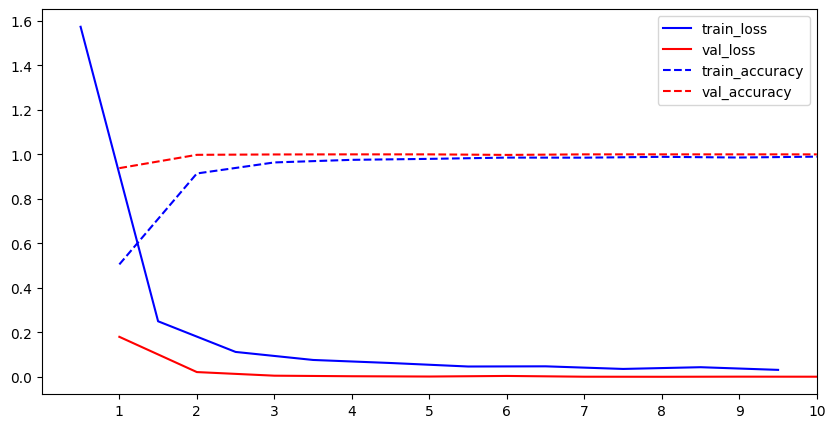

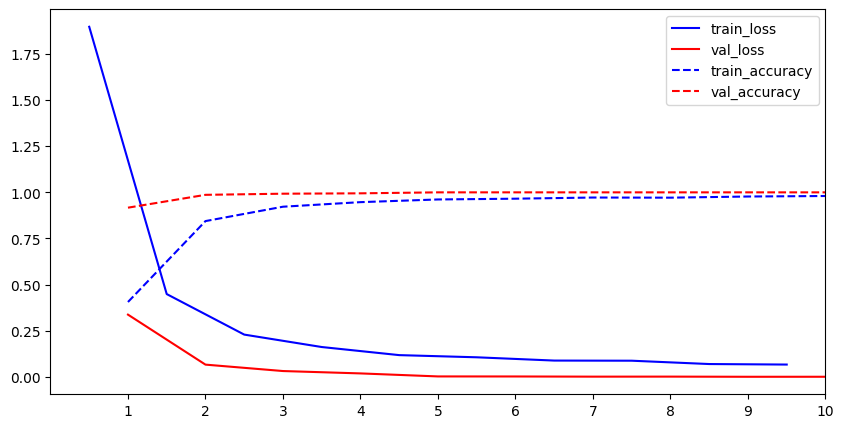

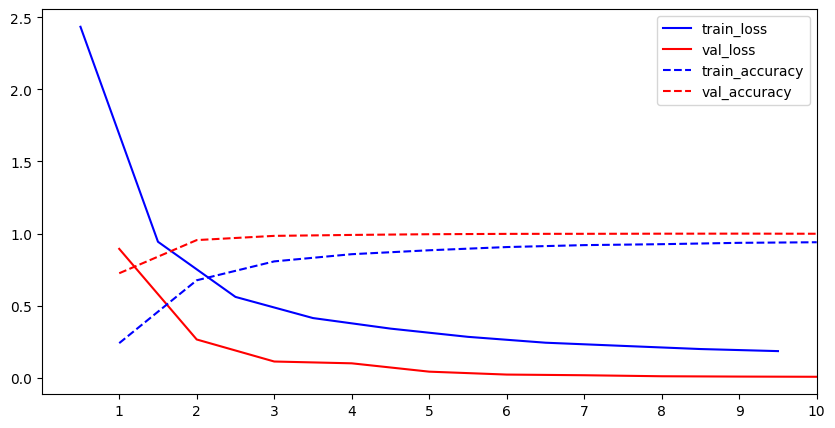

In [92]:
h_0 = np.load('models/experiment-dropout-0-history', allow_pickle=True)
h_1 = np.load('models/experiment-dropout-1-history', allow_pickle=True)
h_2 = np.load('models/experiment-dropout-2-history', allow_pickle=True)

get_train_val_plots(h_0)
get_train_val_plots(h_1)
get_train_val_plots(h_2)

Select Model 1

## Data Augmentation

In [93]:
# Sample Code

data_augmentation = keras.models.Sequential()
data_augmentation.add(keras.layers.RandomRotation(0.1, fill_mode='nearest', input_shape=(28, 28, 1)))
data_augmentation.add(keras.layers.RandomZoom((0.15, 0.2), fill_mode='nearest'))
data_augmentation.add(keras.layers.RandomTranslation(0.1, 0.1, fill_mode='nearest'))

model = keras.models.Sequential()
# Add the layers from the above model

Improves the models performance by decreasing the tendency to overfit

## Other Hyperparameters to try

1. Batch Normalization - It normalizes the layer inputs
2. Deeper networks work well - Replacing the single convolution layer of filter size (5X5) with two successive consecutive convolution layers of filter size (3X3)
3. Number of units in the dense layer and number of dense layers
4. Replacing the MaxPooling Layer with a convolution layer having a stride > 1
5. Optimizers
6. Learning rate of the optimizer

## Visualising the final model

In [94]:
best_model = keras.models.load_model('models/experiment-dropout-0/')
plot_model(best_model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Performance on the Test Set

In [95]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [96]:
best_model = keras.models.load_model('models/experiment-dropout-0/')

In [97]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 4s 16ms/step - loss: 13.9326 - accuracy: 0.9750
Loss: 13.933 Accuracy: 0.975


Accuracy: 96%

In [98]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [99]:
# Applying normalisation which is applied for X_train
X_test /= 255.0

In [100]:
best_model = keras.models.load_model('models/experiment-dropout-0/')

In [101]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 3s 15ms/step - loss: 0.0933 - accuracy: 0.9756
Loss: 0.093 Accuracy: 0.976


Accuracy: 96%